#Spam Detection

In [54]:
#Importing pandas and numoy library
import numpy as np 
import pandas as pd 
import nltk
import sklearn

In [58]:
#Loading and processing Datas
data = pd.read_csv('spam.csv',encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"sms"})
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
#Adding new column to the dataset for length of SMS
data['length'] = data['sms'].apply(len)
data.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
#Importing Matplotlib library.
import matplotlib.pyplot as plt
%matplotlib inline

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

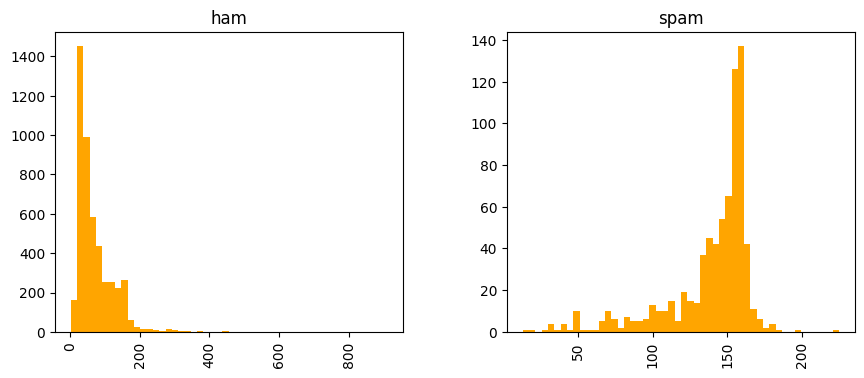

In [61]:
#Plotting the histogram
data.hist(column='length', by='label', bins=50,figsize=(10,4),color="orange")

In [62]:
data

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,162
5568,ham,Will ï¿½_ b going to esplanade fr home?,39
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [63]:
#labelling the Ham and Spam by 0 and 1
data.loc[:,'label'] = data.label.map({'ham':0, 'spam':1})
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1896\1899913059.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'label'] = data.label.map({'ham':0, 'spam':1})


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [64]:
#Importing Libraries
import string
import pprint
from collections import Counter
from collections import Counter

In [65]:
#Defining a function to return the frequency of words in documents
def frequency(documents):
    lower_case_documents = []
    lower_case_documents = [d.lower() for d in documents]
    sans_punctuation_documents = []
    for i in lower_case_documents:
        sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation))) 
    preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
    frequency_list = []
    frequency_list = [Counter(d) for d in preprocessed_documents]
    return lower_case_documents,preprocessed_documents,frequency_list

In [66]:
#The documents variable contains list of documents
documents = ['Hello, how are you!','Win money, win from home.','Call me now.','Hello, Call hello you tomorrow?']

In [67]:
#Extracting the data using the above function
lower_case_documents,preprocessed_documents,frequency_list=frequency(documents)
frequency_list

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]

In [68]:
#Importing countervectorizer module from sklearn library
from sklearn.feature_extraction.text import CountVectorizer
count_vec= CountVectorizer()

In [69]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
#Fitting the model to the vector
count_vec.fit(documents)

CountVectorizer()

In [84]:
count_vec.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [79]:
#Converting the vector into array
doc_array = count_vec.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [85]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vec.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [72]:
#Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [73]:
#Splitting the training and test dataset
X_train, X_test, y_train, y_test = train_test_split(data['sms'],data['label'],test_size=0.20,random_state=1)
# Fitting the training data and then return the matrix
training_data = count_vec.fit_transform(X_train)
# Transforming testing data and return the matrix. 
testing_data = count_vec.transform(X_test)

In [86]:
#Importing Naivebayes from sklearn
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [87]:
#Training the model
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [76]:
#Predicting the model using test data
predictions = naive_bayes.predict(testing_data)

In [88]:
#Importing accuracy score and precision score from sklearn library and printing the precision
from sklearn.metrics import accuracy_score, precision_score
print('Accuracy score : {}'.format(accuracy_score(y_test, predictions)))
print('Precision score : {}'.format(precision_score(y_test, predictions)))

Accuracy score : 0.9856502242152466
Precision score : 0.9424460431654677
